In [ ]:
Part 1: Understanding Optimizer
1. What is the role of optimization algorithms in artificial neural networks? Why are they necessary
2. Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms 
of convergence speed and memory requirements
3. Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow 
convergence, local minima). How do modern optimizers address these challenges
4. Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do 
they impact convergence and model performance?

In [ ]:
1. The process of minimizing (or maximizing) any mathematical expression is called optimization. 
Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. 
Optimizers are used to solve optimization problems by minimizing the function

In [ ]:
2. Gradient Descent is the most common optimization algorithm in machine learning and deep learning. 
It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. 
On each iteration, we update the parameters in the opposite direction of the gradient of the objective function J(w) w.r.t the parameters where the gradient gives the direction of the steepest ascent. 
The size of the step we take on each iteration to reach the local minimum is determined by the learning rate α. 
Therefore, we follow the direction of the slope downhill until we reach a local minimum.

In [ ]:
There are three types of gradient descent learning algorithms: batch gradient descent, stochastic gradient descent and mini-batch gradient descent.

a. Batch gradient descent
 
Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.

While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.

b. Stochastic gradient descent
 
Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

c. Mini-batch gradient descent
 
Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.


In [ ]:
3. The problem with gradient descent is that the weight update at a moment (t) is governed by the learning rate and gradient at that moment only. 
It doesn't take into account the past steps taken while traversing the cost space.

Local minima of the problem solved by adding past weight update to the current weight update by using momentum.

Momentum, simply put, adds a fraction of the past weight update to the current weight update. 
This helps prevent the model from getting stuck in local minima, as even if the current gradient is 0, the past one most likely was not, so it will as easily get stuck.

In [ ]:
4. Momentum is a widely-used strategy for accelerating the convergence of gradient-based optimization techniques. 
Momentum was designed to speed up learning in directions of low curvature, without becoming unstable in directions of high curvature

In [ ]:
The learning rate is a parameter in such algorithms. It is a hyper-parameter that governs the amount of alteration of the weights in the network concerning the loss gradient. The lower the value, the slower it moves downhill

In [ ]:
Part 2: Optimizer Technique
5. Explain the concept of Stochastic Gradient Descent (SGD) and its advantages compared to traditional 
gradient descent. Discuss its limitations and scenarios where it is most suitable
6. Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. 
Discuss its benefits and potential drawbacks
7. Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning 
rates. Compare it with Adam and discuss their relative strengths and weaknesses.

In [ ]:
5. Stochastic Gradient Descent (SGD)

The only difference comes while iterating. In Gradient Descent, we consider all the points in calculating loss and derivative, while in Stochastic gradient descent, we use single point in loss function and its derivative randomly.

Advantages of Stochastic Gradient Descent:
It is easier to fit into memory due to a single training sample being processed by the network.
It is computationally fast as only one sample is processed at a time.
For larger datasets it can converge faster as it causes updates to the parameters more frequently.

The primary disadvantage of stochastic methods is that their accuracy is not very good, though it's usually close enough. 
For this reason they are typically not used when another method is feasible.

In [ ]:
6.Adam optimizer:
    
Adam optimizer is Adaptive momentum, combining momentum and RMS

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

Adam optimizer is a powerful tool for improving the accuracy and speed of deep learning models. Its adaptive learning rate and momentum-based approach can help the neural network learn faster and converge more quickly towards the optimal set of parameters that minimize the cost or loss function.

In [ ]:
7.RMSprop optimizer:
    
RMSProp, root mean squared propagation is the optimization machine learning algorithm to train the Artificial Neural Network (ANN) by different adaptive learning rate and derived from the concepts of gradients descent and RProp.

Adam is slower to change its direction, and then much slower to get back to the minimum. However, rmsprop with momentum reaches much further before it changes direction   

In [ ]:
Part 3: Applying Optimizer
8 Implement SGD, Adam, and RMSprop optimizers in a deep learning model using a framework of your 
choice. Train the model on a suitable dataset and compare their impact on model convergence and 
performance
9 Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural 
network architecture and task. Consider factors such as convergence speed, stability, and 
generalization performance.

## SGD

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

mnist=tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf=tf.keras.models.Sequential(LAYERS)

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=16)

pd.DataFrame(history.history)

Epoch 1/10
3438/3438 [==============================] - 10s 3ms/step - loss: 0.4659 - accuracy: 0.8745 - val_loss: 0.2493 - val_accuracy: 0.9308
Epoch 2/10
3438/3438 [==============================] - 8s 2ms/step - loss: 0.2297 - accuracy: 0.9341 - val_loss: 0.1822 - val_accuracy: 0.9520
Epoch 3/10
3438/3438 [==============================] - 8s 2ms/step - loss: 0.1739 - accuracy: 0.9500 - val_loss: 0.1541 - val_accuracy: 0.9568
Epoch 4/10
3438/3438 [==============================] - 8s 2ms/step - loss: 0.1400 - accuracy: 0.9603 - val_loss: 0.1257 - val_accuracy: 0.9662
Epoch 5/10
3438/3438 [==============================] - 8s 2ms/step - loss: 0.1160 - accuracy: 0.9673 - val_loss: 0.1120 - val_accuracy: 0.9702
Epoch 6/10
3438/3438 [==============================] - 8s 2ms/step - loss: 0.0984 - accuracy: 0.9722 - val_loss: 0.1000 - val_accuracy: 0.9726
Epoch 7/10
3438/3438 [==============================] - 7s 2ms/step - loss: 0.0848 - accuracy: 0.9766 - val_loss: 0.0906 - val_accuracy

,loss,accuracy,val_loss,val_accuracy
0,0.465939,0.874473,0.249258,0.9308
1,0.229686,0.934127,0.182161,0.9520
2,0.173858,0.950018,0.154097,0.9568
3,0.139954,0.960255,0.125660,0.9662
4,0.115963,0.967273,0.111992,0.9702
5,0.098356,0.972218,0.100030,0.9726
6,0.084822,0.976600,0.090610,0.9740
7,0.073912,0.979418,0.088474,0.9764
8,0.065267,0.981673,0.078379,0.9790
9,0.057991,0.984200,0.078425,0.9780


<Axes: >

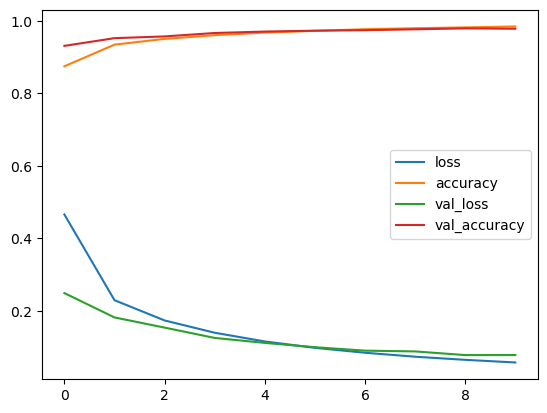

In [4]:
pd.DataFrame(history.history).plot()

## Adam Optimizer

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

mnist=tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf=tf.keras.models.Sequential(LAYERS)

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "Adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=16)

pd.DataFrame(history.history)

Epoch 1/10
3438/3438 [==============================] - 12s 3ms/step - loss: 0.2012 - accuracy: 0.9392 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 2/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0895 - accuracy: 0.9723 - val_loss: 0.0965 - val_accuracy: 0.9724
Epoch 3/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0623 - accuracy: 0.9802 - val_loss: 0.0762 - val_accuracy: 0.9794
Epoch 4/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0494 - accuracy: 0.9840 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 5/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.0780 - val_accuracy: 0.9798
Epoch 6/10
3438/3438 [==============================] - 9s 3ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0761 - val_accuracy: 0.9812
Epoch 7/10
3438/3438 [==============================] - 13s 4ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0902 - val_accurac

,loss,accuracy,val_loss,val_accuracy
0,0.201218,0.939218,0.117696,0.9646
1,0.089514,0.972345,0.096509,0.9724
2,0.062283,0.980164,0.076237,0.9794
3,0.049352,0.984036,0.081555,0.9758
4,0.039082,0.987127,0.078017,0.9798
5,0.031946,0.989618,0.076150,0.9812
6,0.025986,0.992073,0.090158,0.9792
7,0.024929,0.992127,0.111279,0.9774
8,0.022823,0.992727,0.123472,0.9760
9,0.019170,0.993727,0.115832,0.9772


<Axes: >

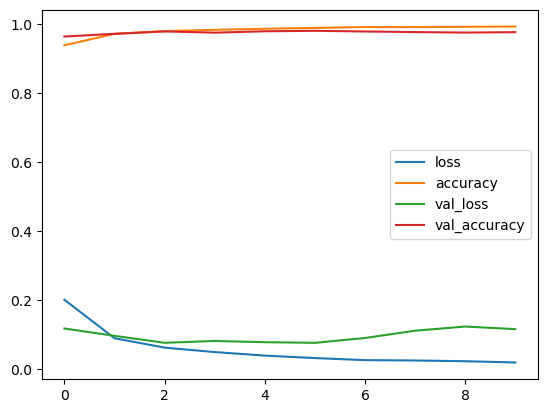

In [6]:
pd.DataFrame(history.history).plot()

In [ ]:
## RMSP Optimizer

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

mnist=tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

# Creating layers of ANN
LAYERS=[tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf=tf.keras.models.Sequential(LAYERS)

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "rmsprop" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=16)

pd.DataFrame(history.history)

Epoch 1/10
3438/3438 [==============================] - 16s 4ms/step - loss: 0.2089 - accuracy: 0.9383 - val_loss: 0.1200 - val_accuracy: 0.9698
Epoch 2/10
3438/3438 [==============================] - 12s 4ms/step - loss: 0.1115 - accuracy: 0.9709 - val_loss: 0.1472 - val_accuracy: 0.9678
Epoch 3/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0962 - accuracy: 0.9775 - val_loss: 0.1205 - val_accuracy: 0.9764
Epoch 4/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0808 - accuracy: 0.9813 - val_loss: 0.1281 - val_accuracy: 0.9740
Epoch 5/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0789 - accuracy: 0.9842 - val_loss: 0.1494 - val_accuracy: 0.9784
Epoch 6/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0727 - accuracy: 0.9853 - val_loss: 0.1333 - val_accuracy: 0.9802
Epoch 7/10
3438/3438 [==============================] - 11s 3ms/step - loss: 0.0648 - accuracy: 0.9879 - val_loss: 0.2056 - val_ac

,loss,accuracy,val_loss,val_accuracy
0,0.208942,0.938309,0.120033,0.9698
1,0.111486,0.970945,0.147187,0.9678
2,0.096204,0.977455,0.120468,0.9764
3,0.080794,0.981255,0.128114,0.9740
4,0.078903,0.984182,0.149368,0.9784
5,0.072695,0.985345,0.133293,0.9802
6,0.064837,0.987855,0.205642,0.9754
7,0.060335,0.988309,0.167485,0.9770
8,0.053557,0.989927,0.211679,0.9742
9,0.051048,0.990636,0.185492,0.9778


<Axes: >

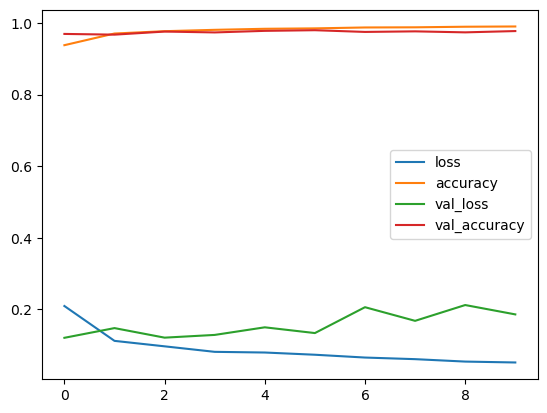

In [9]:
pd.DataFrame(history.history).plot()

## SGD optimizer showing better resukts ciompared to Adama and rmsp